# Import Packages

In [1]:
# Import Libraries
import warnings; warnings.filterwarnings('ignore')
from nilmtk import DataSet
import matplotlib.pyplot as plt
from nilmtk.datastore import HDFDataStore
import pickle
import tables
import numpy as np
import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

# Train & Val

In [3]:
# Import Data

train_redd = DataSet('redd.h5')

In [4]:
# Select Building

train_elec1 = train_redd.buildings[1].elec
train_elec3 = train_redd.buildings[3].elec
train_elec4 = train_redd.buildings[4].elec

In [5]:
# Building 1 for each load appliance

cols = ['fridge', 'sockets', 'light', 'microwave']
indices = [5, 7, 9, 11]
counter = 0

df1 = []

for counter in range(len(cols)):
    df = next(train_elec1.select(instance = indices[counter]).load())
    df.columns = [cols[counter]]
    df.dropna()
    df1.append(df)

df_fin = df1[0]

for df in df1[1:]:
    df_fin = df_fin.merge(df, how = 'inner', left_index = True, right_index = True)

Loading data for meter ElecMeterID(instance=5, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=7, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=9, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=11, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


In [6]:
df_fin = df_fin[:-1]
df_fin

,fridge,sockets,light,microwave
2011-04-18 09:22:12-04:00,6.0,34.0,81.0,5.0
2011-04-18 09:22:15-04:00,6.0,34.0,81.0,5.0
2011-04-18 09:22:18-04:00,6.0,34.0,81.0,5.0
2011-04-18 09:22:21-04:00,6.0,35.0,81.0,5.0
2011-04-18 09:22:24-04:00,6.0,34.0,81.0,5.0
...,...,...,...,...
2011-05-24 15:56:18-04:00,186.0,26.0,2.0,4.0
2011-05-24 15:56:21-04:00,187.0,24.0,2.0,4.0
2011-05-24 15:56:24-04:00,187.0,24.0,2.0,4.0
2011-05-24 15:56:27-04:00,190.0,24.0,2.0,4.0


In [7]:
df_fin = pd.concat([df_fin.loc[:'2011-05-02 23:57:00'], df_fin.loc['2011-05-07 00:00:00':]], axis = 0)


In [8]:
df_fin.index = pd.date_range(start = '2011-04-18 09:22:12-04:00', periods= 929428, freq = '3S')

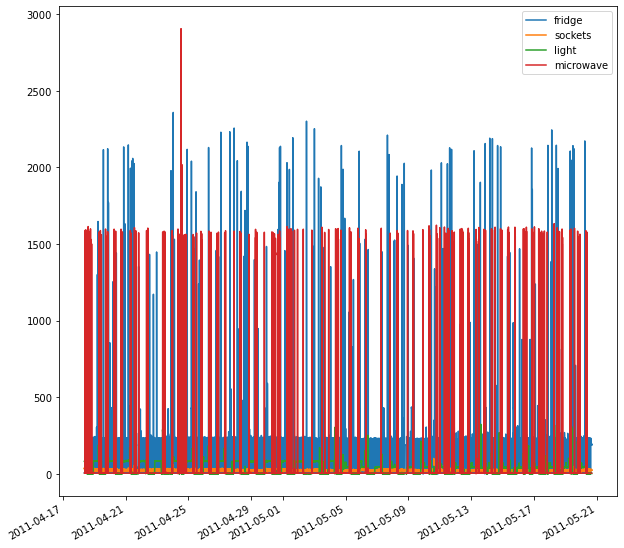

In [9]:
df_fin.plot()


In [10]:
air_con = pd.read_csv('datasets\AMPdsR1_1min_A.csv')

In [11]:
air_con[['HPE']]

,HPE
0,15.8
1,15.8
2,15.8
3,0.2
4,0.2
...,...
524539,0.4
524540,0.4
524541,0.4
524542,0.4


In [12]:
air_con = air_con[['HPE']] * 230

In [13]:
air_con

,HPE
0,3634.0
1,3634.0
2,3634.0
3,46.0
4,46.0
...,...
524539,92.0
524540,92.0
524541,92.0
524542,92.0


In [14]:
temp = air_con['HPE'].values.tolist()

In [15]:
temp2 = []

for ele in temp:
    temp2 += [ele] * 20

In [16]:
air_con = pd.DataFrame({'HPE': temp2})

In [17]:
df_fin

,fridge,sockets,light,microwave
2011-04-18 09:22:12-04:00,6.0,34.0,81.0,5.0
2011-04-18 09:22:15-04:00,6.0,34.0,81.0,5.0
2011-04-18 09:22:18-04:00,6.0,34.0,81.0,5.0
2011-04-18 09:22:21-04:00,6.0,35.0,81.0,5.0
2011-04-18 09:22:24-04:00,6.0,34.0,81.0,5.0
...,...,...,...,...
2011-05-20 15:53:21-04:00,186.0,26.0,2.0,4.0
2011-05-20 15:53:24-04:00,187.0,24.0,2.0,4.0
2011-05-20 15:53:27-04:00,187.0,24.0,2.0,4.0
2011-05-20 15:53:30-04:00,190.0,24.0,2.0,4.0


In [18]:
air_con

,HPE
0,3634.0
1,3634.0
2,3634.0
3,3634.0
4,3634.0
...,...
10490875,92.0
10490876,92.0
10490877,92.0
10490878,92.0


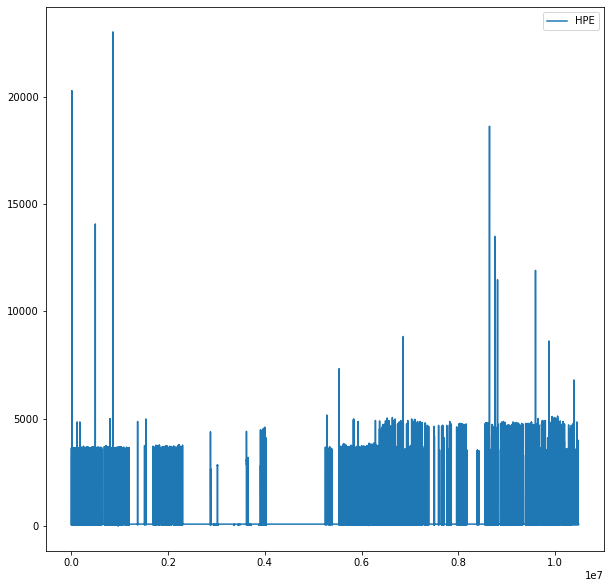

In [19]:
air_con.plot()

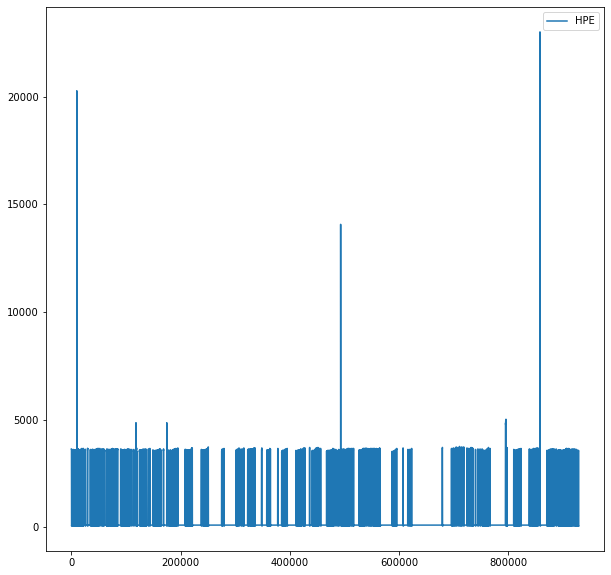

In [20]:
air_con[:929428].plot()

In [21]:
air_con = air_con[:929428]

In [22]:
df_fin['HPE'] = air_con['HPE'].values.tolist()
df_fin

,fridge,sockets,light,microwave,HPE
2011-04-18 09:22:12-04:00,6.0,34.0,81.0,5.0,3634.0
2011-04-18 09:22:15-04:00,6.0,34.0,81.0,5.0,3634.0
2011-04-18 09:22:18-04:00,6.0,34.0,81.0,5.0,3634.0
2011-04-18 09:22:21-04:00,6.0,35.0,81.0,5.0,3634.0
2011-04-18 09:22:24-04:00,6.0,34.0,81.0,5.0,3634.0
...,...,...,...,...,...
2011-05-20 15:53:21-04:00,186.0,26.0,2.0,4.0,46.0
2011-05-20 15:53:24-04:00,187.0,24.0,2.0,4.0,46.0
2011-05-20 15:53:27-04:00,187.0,24.0,2.0,4.0,46.0
2011-05-20 15:53:30-04:00,190.0,24.0,2.0,4.0,46.0


In [23]:
# Ensure data is within 3 standard deviations (Peg Outliers to Upper Limit)

def within_three_std(arr):
    lst = []
    lower = 0
    upper = arr.mean() + 3 * arr.std()
    print(upper)
    
    for ele in arr:
        if ele > upper:
            lst.append(upper)
        
        elif ele < lower:
            lst.append(lower)
        
        else:
            lst.append(ele)
    
    return lst  

for col in df_fin.columns:
    df_fin[col] = within_three_std(df_fin[col])

325.1712646484375
26.700886249542236
184.16803359985352
500.2620162963867
4461.170960517491


In [24]:
df_fin.describe()

,fridge,sockets,light,microwave,HPE
count,929428.000000,929428.000000,929428.000000,929428.000000,929428.000000
mean,55.539701,21.068805,35.500962,9.905178,635.702266
std,83.942682,1.823492,41.718544,52.525018,1263.780849
min,0.000000,2.000000,0.000000,0.000000,46.000000
25%,6.000000,20.000000,2.000000,4.000000,92.000000
50%,7.000000,21.000000,3.000000,4.000000,92.000000
75%,181.000000,22.000000,80.000000,4.000000,92.000000
max,325.171265,26.700886,184.168034,500.262016,4461.170961


In [25]:
df_fin['sockets'] = df_fin['sockets'] * 5

In [26]:
df_fin.describe()

,fridge,sockets,light,microwave,HPE
count,929428.000000,929428.000000,929428.000000,929428.000000,929428.000000
mean,55.539701,105.344024,35.500962,9.905178,635.702266
std,83.942682,9.117461,41.718544,52.525018,1263.780849
min,0.000000,10.000000,0.000000,0.000000,46.000000
25%,6.000000,100.000000,2.000000,4.000000,92.000000
50%,7.000000,105.000000,3.000000,4.000000,92.000000
75%,181.000000,110.000000,80.000000,4.000000,92.000000
max,325.171265,133.504431,184.168034,500.262016,4461.170961


In [27]:
df_fin

,fridge,sockets,light,microwave,HPE
2011-04-18 09:22:12-04:00,6.0,133.504431,81.0,5.0,3634.0
2011-04-18 09:22:15-04:00,6.0,133.504431,81.0,5.0,3634.0
2011-04-18 09:22:18-04:00,6.0,133.504431,81.0,5.0,3634.0
2011-04-18 09:22:21-04:00,6.0,133.504431,81.0,5.0,3634.0
2011-04-18 09:22:24-04:00,6.0,133.504431,81.0,5.0,3634.0
...,...,...,...,...,...
2011-05-20 15:53:21-04:00,186.0,130.000000,2.0,4.0,46.0
2011-05-20 15:53:24-04:00,187.0,120.000000,2.0,4.0,46.0
2011-05-20 15:53:27-04:00,187.0,120.000000,2.0,4.0,46.0
2011-05-20 15:53:30-04:00,190.0,120.000000,2.0,4.0,46.0


In [28]:
df_fin = df_fin.loc['2011-04-19':'2011-05-19']

In [29]:
df_fin

,fridge,sockets,light,microwave,HPE
2011-04-19 00:00:00-04:00,7.0,95.0,82.0,4.0,3450.0
2011-04-19 00:00:03-04:00,7.0,105.0,82.0,4.0,3450.0
2011-04-19 00:00:06-04:00,7.0,120.0,81.0,4.0,3450.0
2011-04-19 00:00:09-04:00,7.0,120.0,81.0,4.0,3450.0
2011-04-19 00:00:12-04:00,7.0,120.0,81.0,4.0,3519.0
...,...,...,...,...,...
2011-05-19 23:59:45-04:00,6.0,60.0,36.0,4.0,92.0
2011-05-19 23:59:48-04:00,6.0,60.0,36.0,4.0,92.0
2011-05-19 23:59:51-04:00,6.0,60.0,37.0,4.0,92.0
2011-05-19 23:59:54-04:00,6.0,60.0,37.0,4.0,92.0


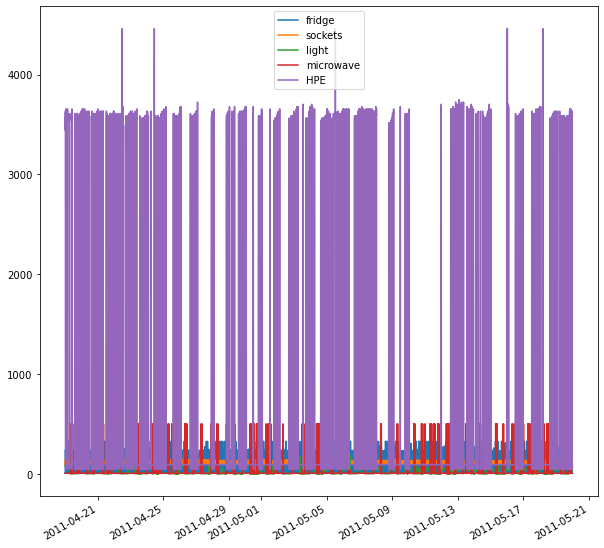

In [30]:
df_fin.plot()

In [31]:
df_fin

,fridge,sockets,light,microwave,HPE
2011-04-19 00:00:00-04:00,7.0,95.0,82.0,4.0,3450.0
2011-04-19 00:00:03-04:00,7.0,105.0,82.0,4.0,3450.0
2011-04-19 00:00:06-04:00,7.0,120.0,81.0,4.0,3450.0
2011-04-19 00:00:09-04:00,7.0,120.0,81.0,4.0,3450.0
2011-04-19 00:00:12-04:00,7.0,120.0,81.0,4.0,3519.0
...,...,...,...,...,...
2011-05-19 23:59:45-04:00,6.0,60.0,36.0,4.0,92.0
2011-05-19 23:59:48-04:00,6.0,60.0,36.0,4.0,92.0
2011-05-19 23:59:51-04:00,6.0,60.0,37.0,4.0,92.0
2011-05-19 23:59:54-04:00,6.0,60.0,37.0,4.0,92.0


In [32]:
# Train 04-19 to 05-12
# Test 05-13 to 05-19
train_df = df_fin.loc['2011-04-19': '2011-05-12']
val_df = df_fin.loc['2011-05-13': '2011-05-19']

In [33]:
train_df2 = train_df.copy()
val_df2 = val_df.copy()

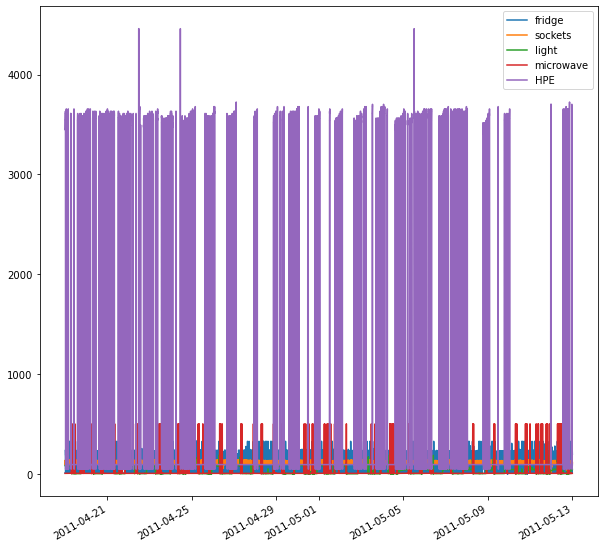

In [34]:
train_df.plot()

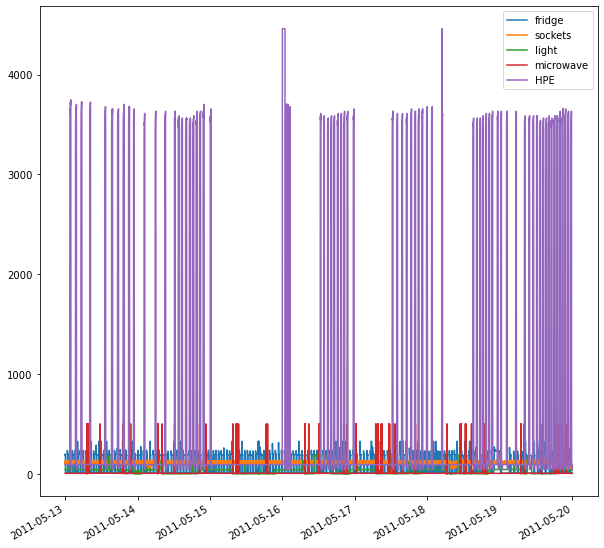

In [35]:
val_df.plot()

In [36]:
# Defections

# Half the values of fridge
# Twice the values of fridge
# Prolonged microwave
# Increased Frequency of Microwave

In [37]:
val_df['fridge'].loc['2011-05-19 12:00:00': '2011-05-19 18:00:00'] = val_df['fridge'].loc['2011-05-19 12:00:00': '2011-05-19 18:00:00'] * 0.5

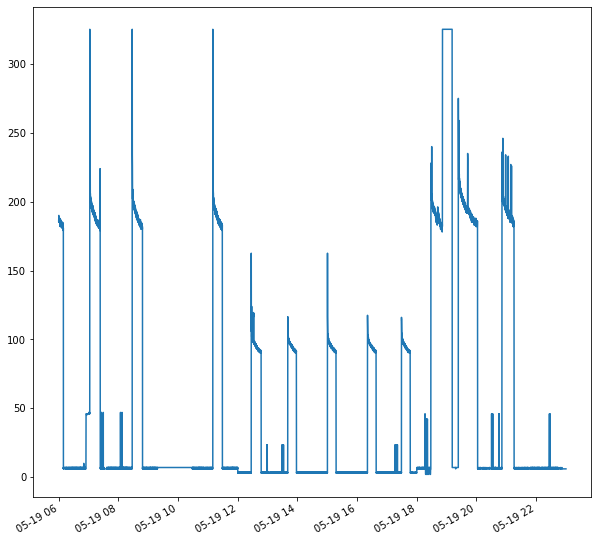

In [38]:
val_df['fridge'].loc['2011-05-19 06:00:00': '2011-05-19 23:00:00'].plot()

In [39]:
val_df['fridge'].loc['2011-05-18 12:00:00': '2011-05-18 18:00:00'] = val_df['fridge'].loc['2011-05-18 12:00:00': '2011-05-18 18:00:00'] * 2

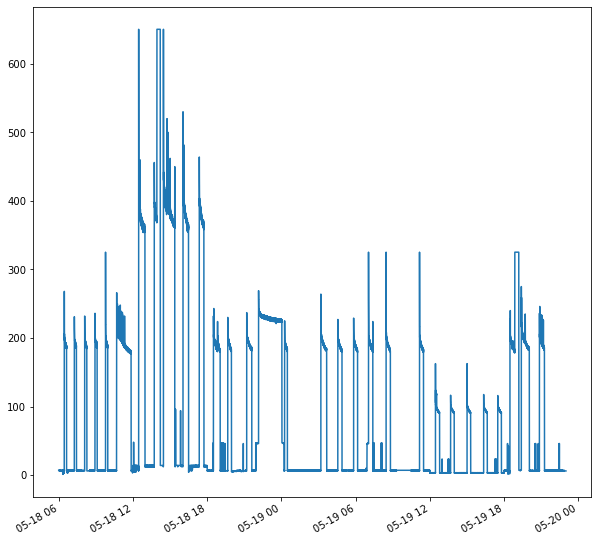

In [40]:
val_df['fridge'].loc['2011-05-18 06:00:00': '2011-05-19 23:00:00'].plot()

In [41]:
val_df['microwave'].loc['2011-05-17 12:00:00': '2011-05-17 18:00:00'] = val_df['microwave'].loc['2011-05-17 12:00:00': '2011-05-17 18:00:00'].max()

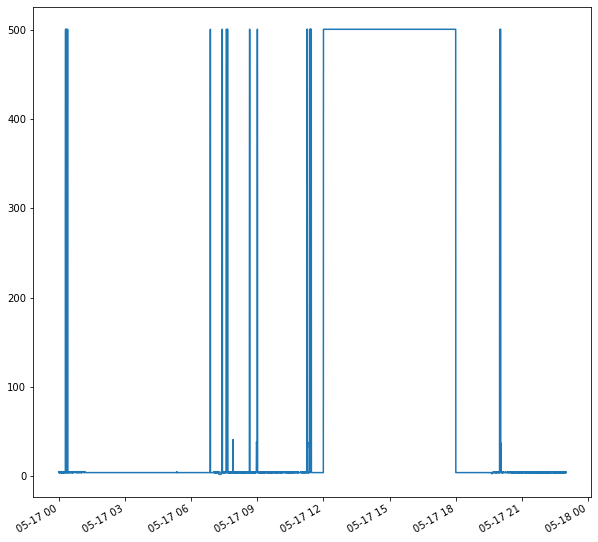

In [42]:
val_df['microwave'].loc['2011-05-17 00:00:00': '2011-05-17 23:00:00'].plot()

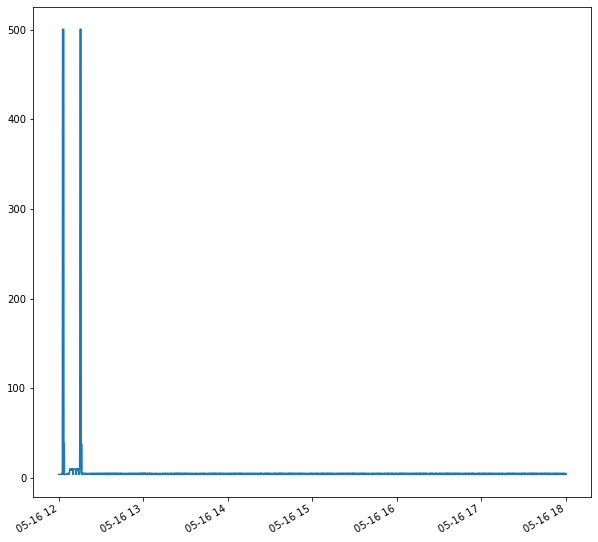

In [43]:
val_df['microwave'].loc['2011-05-16 12:00:00': '2011-05-16 18:00:00'].plot()

In [44]:
val_df['microwave'].loc['2011-05-16 12:00:00': '2011-05-16 17:59:57']

2011-05-16 12:00:00-04:00    4.0
2011-05-16 12:00:03-04:00    4.0
2011-05-16 12:00:06-04:00    4.0
2011-05-16 12:00:09-04:00    4.0
2011-05-16 12:00:12-04:00    4.0
                            ... 
2011-05-16 17:59:45-04:00    5.0
2011-05-16 17:59:48-04:00    4.0
2011-05-16 17:59:51-04:00    4.0
2011-05-16 17:59:54-04:00    4.0
2011-05-16 17:59:57-04:00    4.0
Freq: 3S, Name: microwave, Length: 7200, dtype: float64

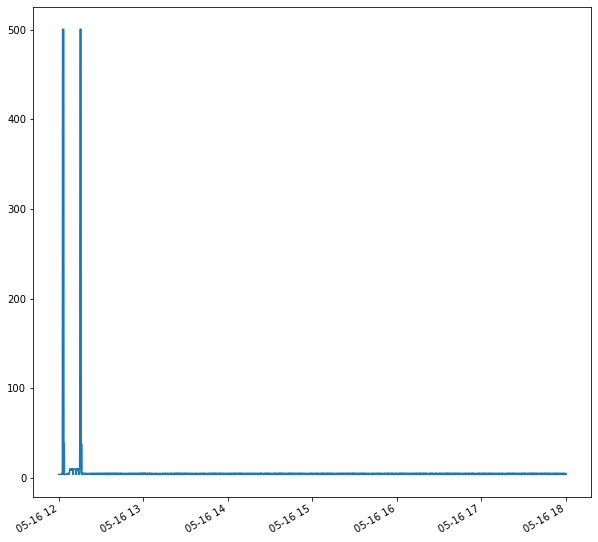

In [45]:
val_df['microwave'].loc['2011-05-16 12:00:00': '2011-05-16 18:00:00'].plot()

In [46]:
val_df['microwave'].loc['2011-05-16 12:00:00': '2011-05-16 17:59:57'] = (val_df['microwave'].loc['2011-05-16 12:00:00': '2011-05-16 18:00:00'].values.tolist()[25:101] * 95)[:7200]

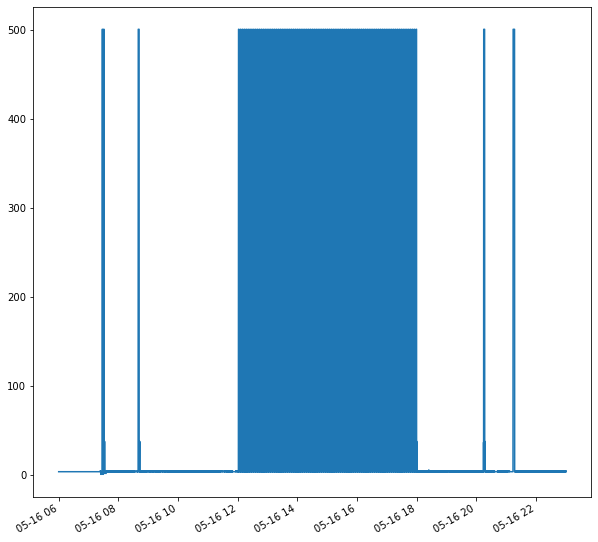

In [47]:
val_df['microwave'].loc['2011-05-16 06:00:00': '2011-05-16 23:00:00'].plot()

In [48]:
val_df['microwave'].loc['2011-05-16 12:00:00': '2011-05-16 17:59:57'] 

2011-05-16 12:00:00-04:00     4.0
2011-05-16 12:00:03-04:00     4.0
2011-05-16 12:00:06-04:00     4.0
2011-05-16 12:00:09-04:00     4.0
2011-05-16 12:00:12-04:00     4.0
                             ... 
2011-05-16 17:59:45-04:00    38.0
2011-05-16 17:59:48-04:00    38.0
2011-05-16 17:59:51-04:00    38.0
2011-05-16 17:59:54-04:00    37.0
2011-05-16 17:59:57-04:00    37.0
Freq: 3S, Name: microwave, Length: 7200, dtype: float64

In [49]:
# (val_df['microwave'].loc['2011-05-16 12:00:00': '2011-05-16 18:00:00'].values.tolist()[25:101] * 95)[:7200]

In [50]:
# val_df['microwave'].loc['2011-05-16 012:00:00': '2011-05-16 18:00:00'].values.tolist()[25:101]

In [51]:
# Generate Aggregate Column

train_df['ALL'] = train_df.sum(axis = 1)

In [52]:
val_df['ALL'] = val_df.sum(axis = 1)

In [53]:
train_df

,fridge,sockets,light,microwave,HPE,ALL
2011-04-19 00:00:00-04:00,7.0,95.0,82.0,4.0,3450.0,3638.0
2011-04-19 00:00:03-04:00,7.0,105.0,82.0,4.0,3450.0,3648.0
2011-04-19 00:00:06-04:00,7.0,120.0,81.0,4.0,3450.0,3662.0
2011-04-19 00:00:09-04:00,7.0,120.0,81.0,4.0,3450.0,3662.0
2011-04-19 00:00:12-04:00,7.0,120.0,81.0,4.0,3519.0,3731.0
...,...,...,...,...,...,...
2011-05-12 23:59:45-04:00,192.0,105.0,43.0,4.0,92.0,436.0
2011-05-12 23:59:48-04:00,195.0,105.0,43.0,4.0,92.0,439.0
2011-05-12 23:59:51-04:00,197.0,115.0,44.0,4.0,92.0,452.0
2011-05-12 23:59:54-04:00,197.0,115.0,44.0,4.0,92.0,452.0


In [54]:
val_df

,fridge,sockets,light,microwave,HPE,ALL
2011-05-13 00:00:00-04:00,192.0,105.0,43.0,4.0,92.0,436.0
2011-05-13 00:00:03-04:00,194.0,100.0,43.0,4.0,92.0,433.0
2011-05-13 00:00:06-04:00,192.0,115.0,43.0,4.0,92.0,446.0
2011-05-13 00:00:09-04:00,192.0,110.0,44.0,4.0,92.0,442.0
2011-05-13 00:00:12-04:00,192.0,105.0,43.0,4.0,92.0,436.0
...,...,...,...,...,...,...
2011-05-19 23:59:45-04:00,6.0,60.0,36.0,4.0,92.0,198.0
2011-05-19 23:59:48-04:00,6.0,60.0,36.0,4.0,92.0,198.0
2011-05-19 23:59:51-04:00,6.0,60.0,37.0,4.0,92.0,199.0
2011-05-19 23:59:54-04:00,6.0,60.0,37.0,4.0,92.0,199.0


In [55]:
col_lst = ['FRIDGE', 'SOCKETS', 'LIGHT', 'MICROWAVE', 'AIRCON', 'MAIN']

train_df.columns = col_lst
val_df.columns = col_lst

In [56]:
train_df

,FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON,MAIN
2011-04-19 00:00:00-04:00,7.0,95.0,82.0,4.0,3450.0,3638.0
2011-04-19 00:00:03-04:00,7.0,105.0,82.0,4.0,3450.0,3648.0
2011-04-19 00:00:06-04:00,7.0,120.0,81.0,4.0,3450.0,3662.0
2011-04-19 00:00:09-04:00,7.0,120.0,81.0,4.0,3450.0,3662.0
2011-04-19 00:00:12-04:00,7.0,120.0,81.0,4.0,3519.0,3731.0
...,...,...,...,...,...,...
2011-05-12 23:59:45-04:00,192.0,105.0,43.0,4.0,92.0,436.0
2011-05-12 23:59:48-04:00,195.0,105.0,43.0,4.0,92.0,439.0
2011-05-12 23:59:51-04:00,197.0,115.0,44.0,4.0,92.0,452.0
2011-05-12 23:59:54-04:00,197.0,115.0,44.0,4.0,92.0,452.0


In [57]:
# Edit Time Zone Settings
# 4 hour difference

lst = list(map(lambda x: int(x.timestamp()), train_df.index))
lst2 = list(map(lambda x: int(x.timestamp()), val_df.index))

# pd.to_datetime(lst[0], unit='s', utc=True)

In [58]:
train_df['TimeStamp'] = lst
val_df['TimeStamp'] = lst2

In [59]:
train_df

,FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON,MAIN,TimeStamp
2011-04-19 00:00:00-04:00,7.0,95.0,82.0,4.0,3450.0,3638.0,1303185600
2011-04-19 00:00:03-04:00,7.0,105.0,82.0,4.0,3450.0,3648.0,1303185603
2011-04-19 00:00:06-04:00,7.0,120.0,81.0,4.0,3450.0,3662.0,1303185606
2011-04-19 00:00:09-04:00,7.0,120.0,81.0,4.0,3450.0,3662.0,1303185609
2011-04-19 00:00:12-04:00,7.0,120.0,81.0,4.0,3519.0,3731.0,1303185612
...,...,...,...,...,...,...,...
2011-05-12 23:59:45-04:00,192.0,105.0,43.0,4.0,92.0,436.0,1305259185
2011-05-12 23:59:48-04:00,195.0,105.0,43.0,4.0,92.0,439.0,1305259188
2011-05-12 23:59:51-04:00,197.0,115.0,44.0,4.0,92.0,452.0,1305259191
2011-05-12 23:59:54-04:00,197.0,115.0,44.0,4.0,92.0,452.0,1305259194


In [60]:
# Rearrange Columns

temp = list(train_df.columns)

train_df = train_df[[temp[-1], temp[-2]] + list(train_df.columns)[:-2]]
train_df

,TimeStamp,MAIN,FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON
2011-04-19 00:00:00-04:00,1303185600,3638.0,7.0,95.0,82.0,4.0,3450.0
2011-04-19 00:00:03-04:00,1303185603,3648.0,7.0,105.0,82.0,4.0,3450.0
2011-04-19 00:00:06-04:00,1303185606,3662.0,7.0,120.0,81.0,4.0,3450.0
2011-04-19 00:00:09-04:00,1303185609,3662.0,7.0,120.0,81.0,4.0,3450.0
2011-04-19 00:00:12-04:00,1303185612,3731.0,7.0,120.0,81.0,4.0,3519.0
...,...,...,...,...,...,...,...
2011-05-12 23:59:45-04:00,1305259185,436.0,192.0,105.0,43.0,4.0,92.0
2011-05-12 23:59:48-04:00,1305259188,439.0,195.0,105.0,43.0,4.0,92.0
2011-05-12 23:59:51-04:00,1305259191,452.0,197.0,115.0,44.0,4.0,92.0
2011-05-12 23:59:54-04:00,1305259194,452.0,197.0,115.0,44.0,4.0,92.0


In [61]:
temp = list(val_df.columns)

val_df = val_df[[temp[-1], temp[-2]] + list(val_df.columns)[:-2]]
val_df

,TimeStamp,MAIN,FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON
2011-05-13 00:00:00-04:00,1305259200,436.0,192.0,105.0,43.0,4.0,92.0
2011-05-13 00:00:03-04:00,1305259203,433.0,194.0,100.0,43.0,4.0,92.0
2011-05-13 00:00:06-04:00,1305259206,446.0,192.0,115.0,43.0,4.0,92.0
2011-05-13 00:00:09-04:00,1305259209,442.0,192.0,110.0,44.0,4.0,92.0
2011-05-13 00:00:12-04:00,1305259212,436.0,192.0,105.0,43.0,4.0,92.0
...,...,...,...,...,...,...,...
2011-05-19 23:59:45-04:00,1305863985,198.0,6.0,60.0,36.0,4.0,92.0
2011-05-19 23:59:48-04:00,1305863988,198.0,6.0,60.0,36.0,4.0,92.0
2011-05-19 23:59:51-04:00,1305863991,199.0,6.0,60.0,37.0,4.0,92.0
2011-05-19 23:59:54-04:00,1305863994,199.0,6.0,60.0,37.0,4.0,92.0


In [65]:
train_df.describe()

,TimeStamp,MAIN,FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON
count,6.912000e+05,691200.000000,691200.000000,691200.000000,691200.000000,691200.000000,691200.000000
mean,1.304222e+09,844.901568,54.161743,105.633367,36.381687,9.837871,638.886899
std,5.985972e+05,1273.590370,82.882991,9.116862,41.064430,52.454886,1264.739087
min,1.303186e+09,113.000000,0.000000,10.000000,0.000000,0.000000,46.000000
25%,1.303704e+09,210.000000,6.000000,100.000000,2.000000,4.000000,92.000000
50%,1.304222e+09,284.000000,7.000000,105.000000,2.000000,4.000000,92.000000
75%,1.304741e+09,435.000000,179.000000,110.000000,81.000000,4.000000,92.000000
max,1.305259e+09,4820.170961,325.171265,133.504431,184.168034,500.262016,4461.170961


In [69]:
train_df2 = train_df.copy()
train_df2.iloc[:, 1:] = train_df.drop(['TimeStamp'], axis = 1) / 1000
train_df2

,TimeStamp,MAIN,FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON
2011-04-19 00:00:00-04:00,1303185600,3.638,0.007,0.095,0.082,0.004,3.450
2011-04-19 00:00:03-04:00,1303185603,3.648,0.007,0.105,0.082,0.004,3.450
2011-04-19 00:00:06-04:00,1303185606,3.662,0.007,0.120,0.081,0.004,3.450
2011-04-19 00:00:09-04:00,1303185609,3.662,0.007,0.120,0.081,0.004,3.450
2011-04-19 00:00:12-04:00,1303185612,3.731,0.007,0.120,0.081,0.004,3.519
...,...,...,...,...,...,...,...
2011-05-12 23:59:45-04:00,1305259185,0.436,0.192,0.105,0.043,0.004,0.092
2011-05-12 23:59:48-04:00,1305259188,0.439,0.195,0.105,0.043,0.004,0.092
2011-05-12 23:59:51-04:00,1305259191,0.452,0.197,0.115,0.044,0.004,0.092
2011-05-12 23:59:54-04:00,1305259194,0.452,0.197,0.115,0.044,0.004,0.092


In [70]:
val_df2 = val_df.copy()
val_df2.iloc[:, 1:] = val_df.drop(['TimeStamp'], axis = 1) / 1000
val_df2

,TimeStamp,MAIN,FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON
2011-05-13 00:00:00-04:00,1305259200,0.436,0.192,0.105,0.043,0.004,0.092
2011-05-13 00:00:03-04:00,1305259203,0.433,0.194,0.100,0.043,0.004,0.092
2011-05-13 00:00:06-04:00,1305259206,0.446,0.192,0.115,0.043,0.004,0.092
2011-05-13 00:00:09-04:00,1305259209,0.442,0.192,0.110,0.044,0.004,0.092
2011-05-13 00:00:12-04:00,1305259212,0.436,0.192,0.105,0.043,0.004,0.092
...,...,...,...,...,...,...,...
2011-05-19 23:59:45-04:00,1305863985,0.198,0.006,0.060,0.036,0.004,0.092
2011-05-19 23:59:48-04:00,1305863988,0.198,0.006,0.060,0.036,0.004,0.092
2011-05-19 23:59:51-04:00,1305863991,0.199,0.006,0.060,0.037,0.004,0.092
2011-05-19 23:59:54-04:00,1305863994,0.199,0.006,0.060,0.037,0.004,0.092


In [73]:
train_df2.to_csv('REDD_modified2_train_kW.csv', index = None)

In [74]:
val_df2.to_csv('REDD_modified2_val_kW.csv', index = None)

In [62]:
train_df.to_csv('REDD_modified2_train.csv', index = None)

In [63]:
val_df.to_csv('REDD_modified2_val.csv', index = None)